<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-07-18 17:07:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  58.5MB/s    in 2.6s    

2025-07-18 17:07:35 (58.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [4]:
!pip install seaborn

import seaborn as sns

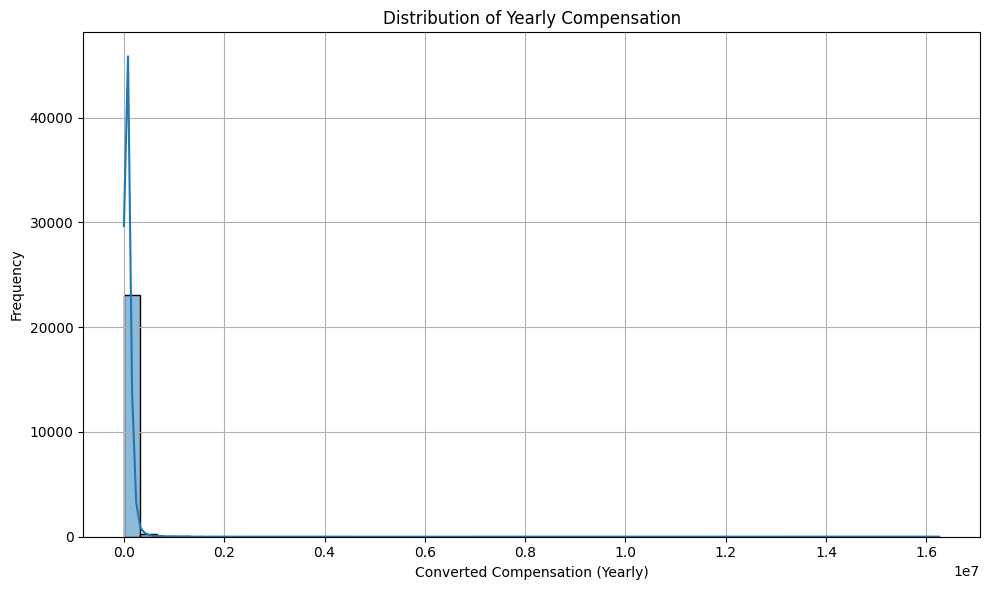

In [5]:
## Write your code here
# Drop missing or invalid values
df = df[df['ConvertedCompYearly'].notnull()]
df = df[df['ConvertedCompYearly'] > 0]  # Remove non-positive values if necessary

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True)
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



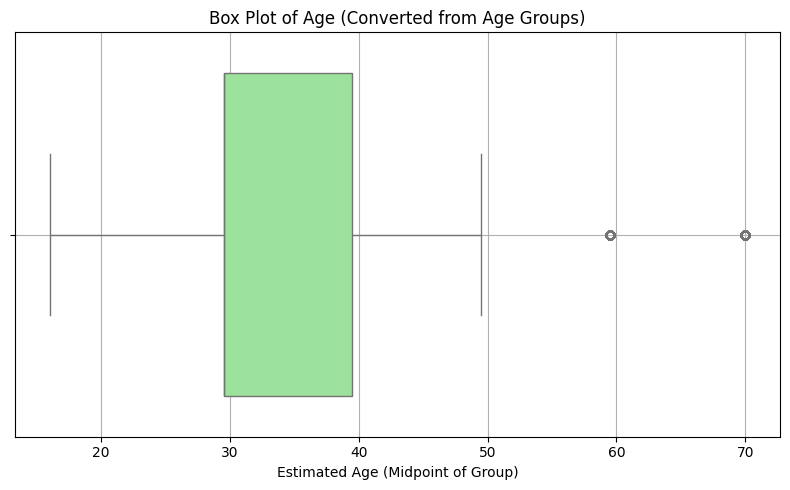

In [6]:
## Write your code here

# Drop missing Age values
df = df[df['Age'].notnull()]

# Define mapping from age group to numerical midpoint
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Map age group to numeric midpoint
df['AgeNumeric'] = df['Age'].map(age_map)

# Drop rows where mapping failed
df = df.dropna(subset=['AgeNumeric'])

# Plot the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AgeNumeric'], color='lightgreen')
plt.title('Box Plot of Age (Converted from Age Groups)')
plt.xlabel('Estimated Age (Midpoint of Group)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



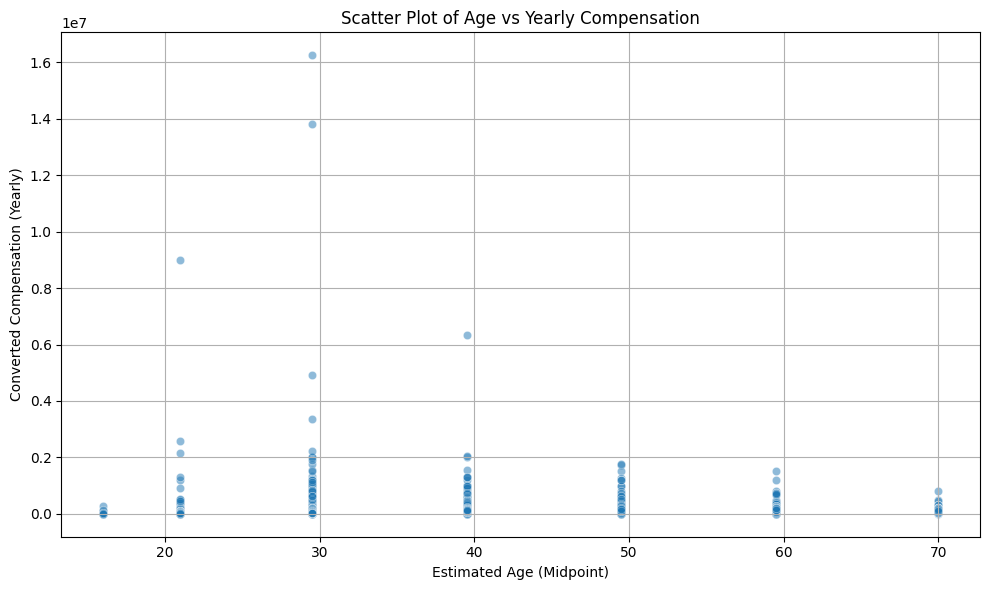

In [7]:
## Write your code here
# Drop rows with missing values
df = df[df['Age'].notnull() & df['ConvertedCompYearly'].notnull()]

# Convert age group to numeric midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['Age_numeric'] = df['Age'].map(age_map)

# Remove rows where conversion failed or comp is non-positive
df = df.dropna(subset=['Age_numeric', 'ConvertedCompYearly'])
df = df[df['ConvertedCompYearly'] > 0]

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age_numeric', y='ConvertedCompYearly', alpha=0.5)
plt.title('Scatter Plot of Age vs Yearly Compensation')
plt.xlabel('Estimated Age (Midpoint)')
plt.ylabel('Converted Compensation (Yearly)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


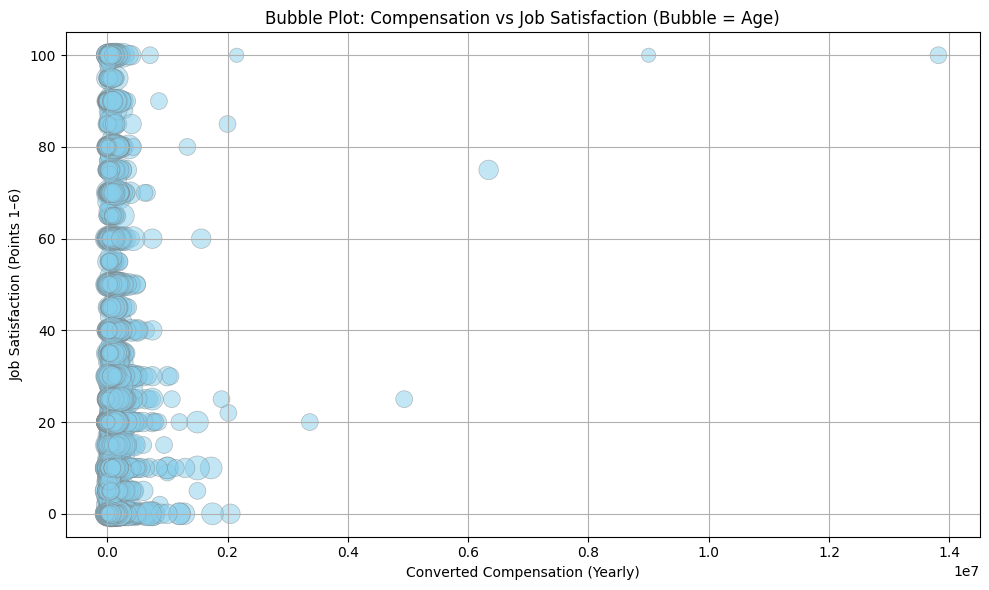

In [8]:
## Write your code here
# Drop missing values
df = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Map age groups to numeric midpoints
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['Age_numeric'] = df['Age'].map(age_map)

# Clean the data
df = df.dropna(subset=['Age_numeric'])
df = df[df['ConvertedCompYearly'] > 0]

# Scale bubble size (optional: makes bubble sizes more visually manageable)
df['bubble_size'] = df['Age_numeric'] * 5

# Plot bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(
    x=df['ConvertedCompYearly'],
    y=df['JobSatPoints_6'],
    s=df['bubble_size'],
    alpha=0.5,
    c='skyblue',
    edgecolors='grey',
    linewidth=0.5
)
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble = Age)')
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Job Satisfaction (Points 1–6)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



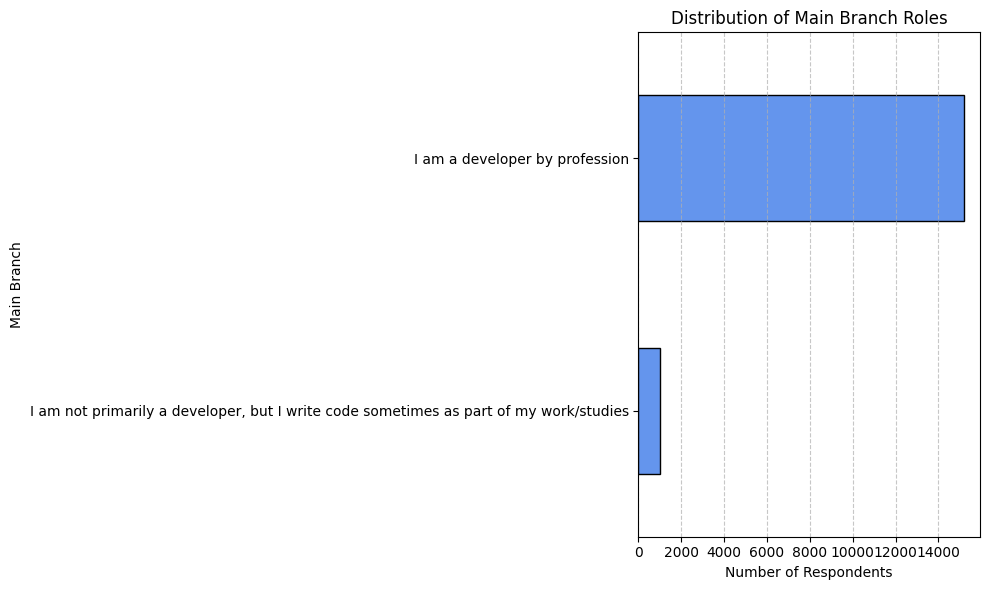

In [9]:
## Write your code here
# Drop missing values
df = df[df['MainBranch'].notnull()]

# Count frequency of each MainBranch category
mainbranch_counts = df['MainBranch'].value_counts().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='cornflowerblue', edgecolor='black')
plt.title('Distribution of Main Branch Roles')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



In [11]:
from collections import Counter

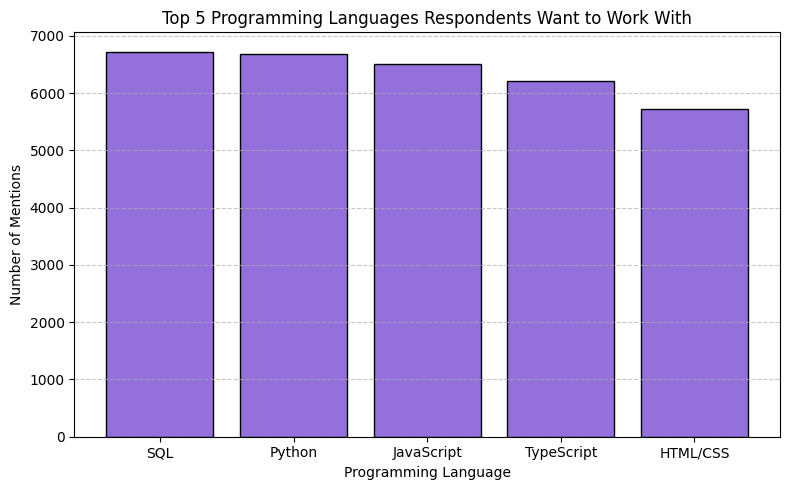

In [12]:
## Write your code here
# Drop missing values
df = df[df['LanguageWantToWorkWith'].notnull()]

# Split multi-language responses (assuming they're separated by semicolons)
all_languages = df['LanguageWantToWorkWith'].str.split(';')
flat_list = [lang.strip() for sublist in all_languages for lang in sublist]

# Count frequencies
lang_counts = Counter(flat_list)
top5 = lang_counts.most_common(5)

# Prepare data for plotting
languages, counts = zip(*top5)

# Plot vertical bar chart
plt.figure(figsize=(8, 5))
plt.bar(languages, counts, color='mediumpurple', edgecolor='black')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Mentions')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


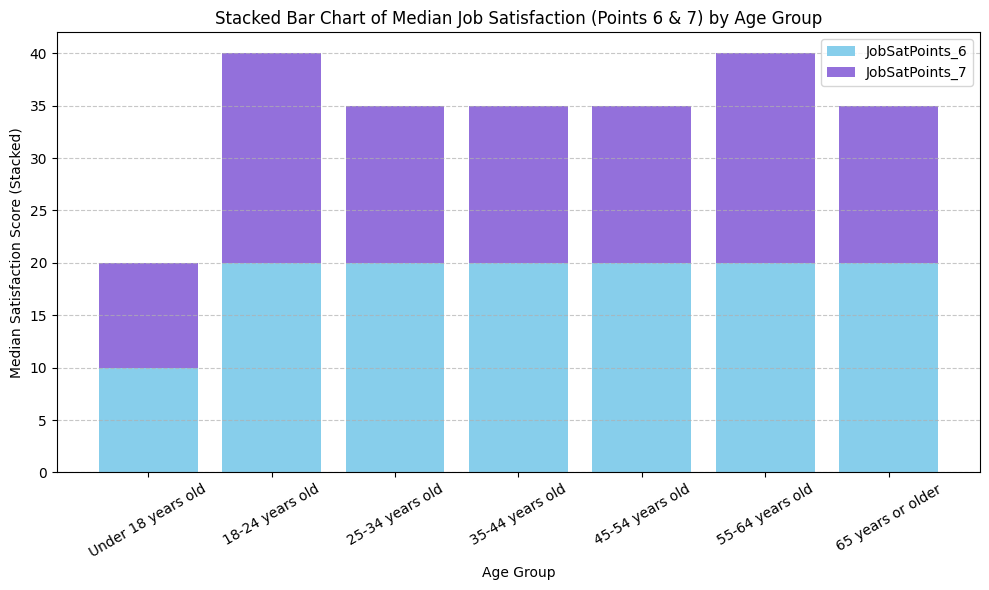

In [13]:
## Write your code here
# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])

# Group by Age and calculate median for each satisfaction point
grouped = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Sort Age groups in expected order (optional, if needed)
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
grouped = grouped.loc[[age for age in age_order if age in grouped.index]]

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['JobSatPoints_6'], label='JobSatPoints_6', color='skyblue')
plt.bar(grouped.index, grouped['JobSatPoints_7'], bottom=grouped['JobSatPoints_6'], label='JobSatPoints_7', color='mediumpurple')

plt.title('Stacked Bar Chart of Median Job Satisfaction (Points 6 & 7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Score (Stacked)')
plt.legend()
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



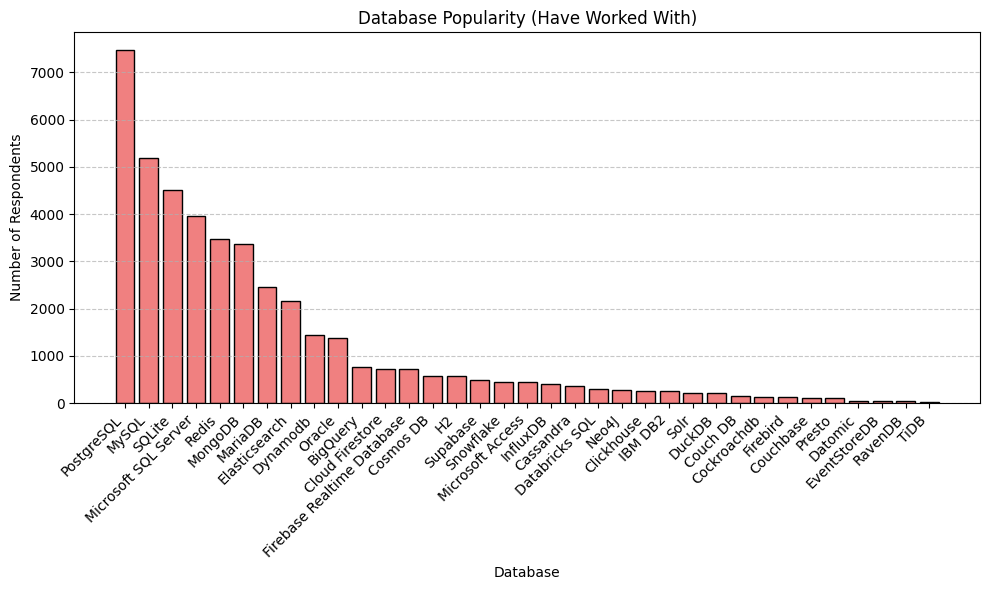

In [14]:
## Write your code here
# Drop missing values
df = df[df['DatabaseHaveWorkedWith'].notnull()]

# Split and flatten the multi-valued responses
all_dbs = df['DatabaseHaveWorkedWith'].str.split(';')
flat_list = [db.strip() for sublist in all_dbs for db in sublist]

# Count each database's frequency
db_counts = Counter(flat_list)
top_dbs = db_counts.most_common()  # You can also use .most_common(10) for top 10

# Prepare data for plotting
db_names, counts = zip(*top_dbs)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(db_names, counts, color='lightcoral', edgecolor='black')
plt.title('Database Popularity (Have Worked With)')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



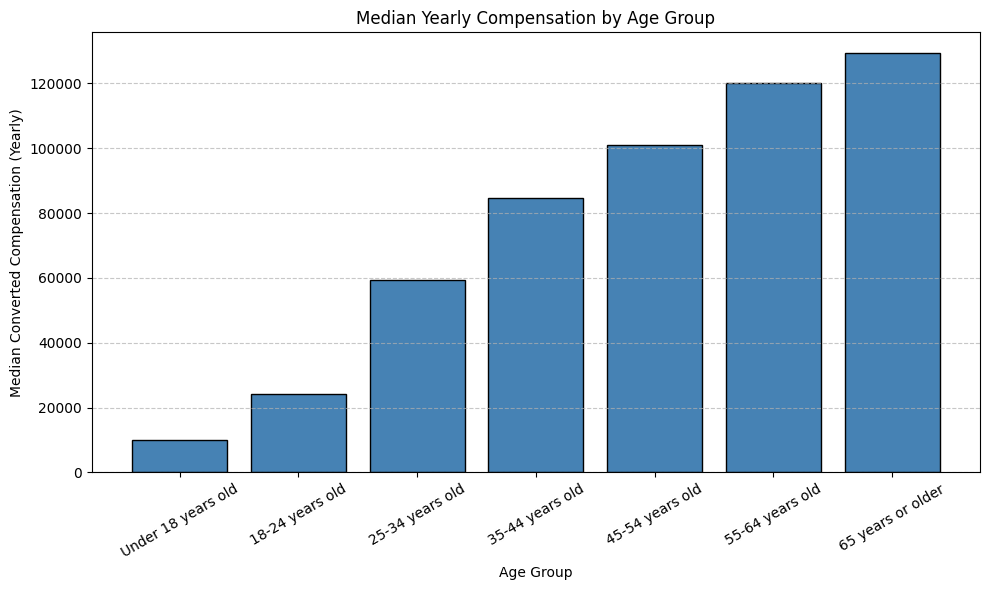

In [15]:
## Write your code here

# Drop missing values
df = df.dropna(subset=['Age', 'ConvertedCompYearly'])
df = df[df['ConvertedCompYearly'] > 0]

# Group by Age and compute median
grouped = df.groupby('Age')['ConvertedCompYearly'].median()

# Sort Age groups (optional)
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
grouped = grouped.loc[[age for age in age_order if age in grouped.index]]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped.values, color='steelblue', edgecolor='black')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Converted Compensation (Yearly)')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here




### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
